# Подготовка данных

In [1]:
import pandas as pd
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
all_data = pd.concat([train, test])
all_data.reset_index(inplace=True)
all_data.drop(['index'], axis=1, inplace=True)
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [4]:
all_data.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [5]:
# Преобразовываем строковые категориальные признаки в численные
def to_categorical(df, columns):
  for column in columns:
    for i, v in enumerate(df[column].dropna().unique()):
      df.loc[df[column] == v, column] = i
    df[column] = df[column].astype('float64')
  return df

all_data = to_categorical(all_data, ['Sex', 'Embarked'])

<Axes: >

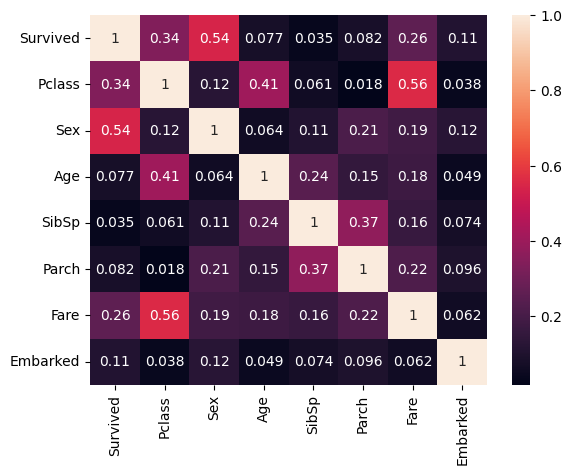

In [6]:
import seaborn as sns

# Просматриваем связь между признаками и визуализируем в виде тепловой карты
corr = all_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].corr().abs()
sns.heatmap(corr, annot=True)

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

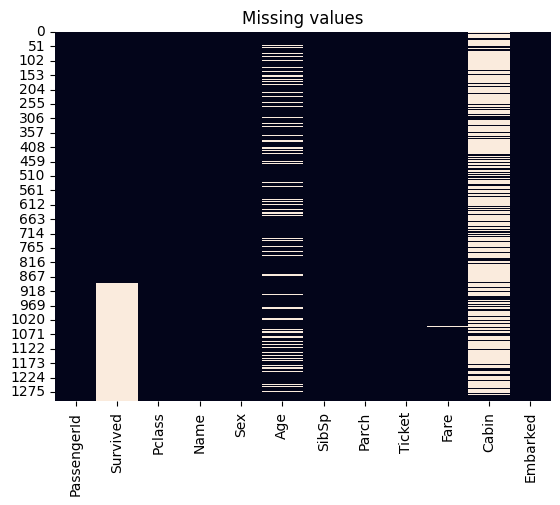

In [7]:
# Смотрим долю пропущенных значений и визуализируем в виде тепловой карты
sns.heatmap(all_data.isnull(), cbar = False).set_title('Missing values')
all_data.isna().sum() / all_data.shape[0]

# Заполняем пропуски

## Убираем пропуски в колонке Cabin

In [8]:
# В колонке Cabin много пропусков, безобаснее удалить всю колонку
all_data.drop(['Cabin'], axis=1, inplace=True)

## Убираем пропуски в колонке Embarked

In [9]:
# Смотрим на строки с пропускам в колонке Embarked
all_data[all_data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1.0,38.0,0,0,113572,80.0,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1.0,62.0,0,0,113572,80.0,NaN


In [10]:
# Эти строки можно безопасно удалить, поскольку они составляют очень малую часть от всех тренировочных данных
all_data.drop(all_data[all_data.Embarked.isna()].index, inplace=True)

## Убираем пропуски в колонке Fare

In [11]:
# Смотрим на строки с пропускам в колонке Fare
all_data[all_data.Fare.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",0.0,60.5,0,0,3701,NaN,0.0


In [12]:
# Поскольку эта строка находится в тестовой выборке (Survived=None), мы не можем ее удалить.
#Подставим на место пропуска медиану стоимости билета всех пассажиров третьего класса, отправившихся из порта 0.0
all_data.at[1043, 'Fare'] = all_data[(all_data.Pclass == 3) & (all_data.Embarked == 0.0)].Fare.median()
all_data.iloc[1043]

PassengerId                            1046
Survived                                NaN
Pclass                                    3
Name           Asplund, Master. Filip Oscar
Sex                                     0.0
Age                                    13.0
SibSp                                     4
Parch                                     2
Ticket                               347077
Fare                                31.3875
Embarked                                0.0
Name: 1045, dtype: object

## Убираем пропуски в колонке Age

In [13]:
# Для быстроты подставим на место пропуска медиану всех возрастов
# Дополнительно: Пропуски в колонке возраста можно заполнить по аналогии с колонокой Fare или решить дополнительно задачу регрессии (предсказывать возраст для каждого пассажира отдельно)
all_data.Age.fillna(all_data.Age.median(), inplace=True)

## Проверяем отсутствие пропусков

In [14]:
all_data.isna().sum() / all_data.shape[0]

PassengerId    0.000000
Survived       0.319816
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.000000
dtype: float64

# Подготовка данных к обучению

In [15]:
# Кодируем значения категориальных ячеек в One Hot Encoding (OHE)
def to_OHE(df, columns):
  for column in columns:
    for i, v in enumerate(df[column].unique()):
      df[column+str(i)] = (df[column] == v).astype('float64')
    df.drop(column, axis=1, inplace=True)
  return df

all_data = to_OHE(all_data, ['Pclass', 'Sex', 'Embarked'])
all_data

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass0,Pclass1,Pclass2,Sex0,Sex1,Embarked0,Embarked1,Embarked2
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,5,0.0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,"Spector, Mr. Woolf",28.0,0,0,A.5. 3236,8.0500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1305,1306,NaN,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1306,1307,NaN,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1307,1308,NaN,"Ware, Mr. Frederick",28.0,0,0,359309,8.0500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Survived     889 non-null    float64
 2   Name         1307 non-null   object 
 3   Age          1307 non-null   float64
 4   SibSp        1307 non-null   int64  
 5   Parch        1307 non-null   int64  
 6   Ticket       1307 non-null   object 
 7   Fare         1307 non-null   float64
 8   Pclass0      1307 non-null   float64
 9   Pclass1      1307 non-null   float64
 10  Pclass2      1307 non-null   float64
 11  Sex0         1307 non-null   float64
 12  Sex1         1307 non-null   float64
 13  Embarked0    1307 non-null   float64
 14  Embarked1    1307 non-null   float64
 15  Embarked2    1307 non-null   float64
dtypes: float64(11), int64(3), object(2)
memory usage: 205.9+ KB


In [17]:
# Убираем неинформативные колонки
all_data.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

In [18]:
# Нормализуем данные к диапазону от 0 до 1
all_data = (all_data - all_data.min()) / (all_data.max() - all_data.min())

In [19]:
# Снова разбиваем данные на train и test
train = all_data.dropna()
test = all_data[all_data.Survived.isna()]
train.shape, test.shape

((889, 13), (418, 13))

In [20]:
# Отделяем признаки (X) от целевой переменной (y)
columns = train.columns[1:]
X = train[columns]
y = train['Survived']

In [21]:
from sklearn.model_selection import train_test_split

# Дополнительно выделяем валидационную (проверочную), чтобы на ней оценивать качество работы модели
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) #  фиксируем random_state, чтобы обеспечить повторимость экспериментов
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((711, 12), (178, 12), (711,), (178,))

# Обучение моделей

## Логистическая регрессия

In [22]:
from sklearn.linear_model import LogisticRegression

# Инициализируем и обучаем модель Логистической Регрессии для классификации
model = LogisticRegression(random_state=42)
model = model.fit(X_train, y_train)

# делаем предсказация для валидационной выборки
pred = model.predict(X_val)

In [23]:
from sklearn.metrics import accuracy_score, mean_absolute_error, precision_score, recall_score, f1_score

# считаем метрики для предсказаний на валидационной выборке
def calc_metrics(y_true, y_pred, metrics=[accuracy_score, mean_absolute_error, precision_score, recall_score, f1_score]):
  for metric in metrics:
    print('{}: {}'.format(metric.__name__, round(metric(y_true, y_pred), 4)))

calc_metrics(y_val, pred)

accuracy_score: 0.7809
mean_absolute_error: 0.2191
precision_score: 0.7027
recall_score: 0.7536
f1_score: 0.7273


## Дерево решений

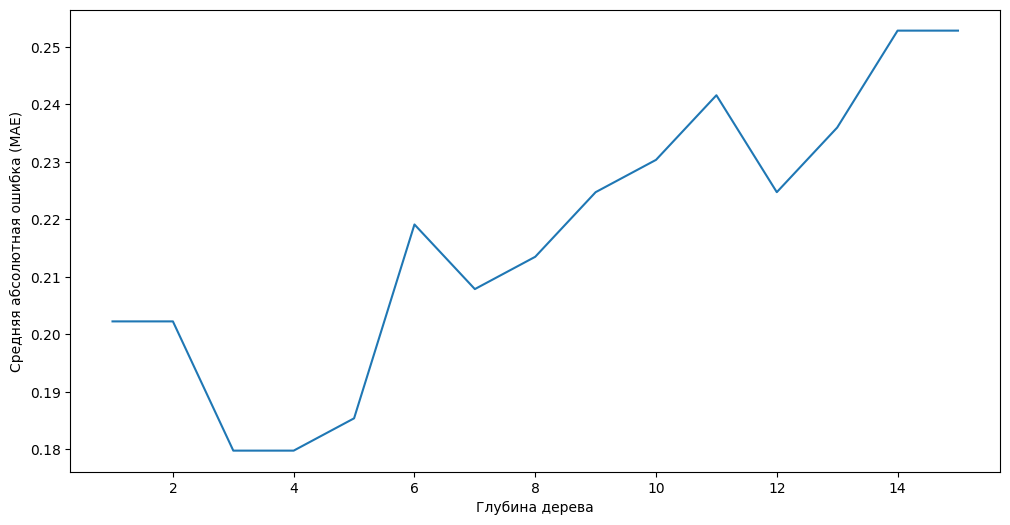

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

mae = []
max_depth = 15

# Перебираем деревья различной глубины
for i in range(1, max_depth+1):
  model = DecisionTreeClassifier(max_depth=i, random_state=42)
  model = model.fit(X_train, y_train)
  pred = model.predict(X_val)
  mae.append(mean_absolute_error(pred, y_val))

# Визуализируем зависимость ошибки от глубины дерева
fig, axes = plt.subplots(figsize=(12, 6))
axes.plot(list(range(1, max_depth + 1)), mae)
axes.set_xlabel('Глубина дерева')
axes.set_ylabel('Средняя абсолютная ошибка (MAE)')
plt.show()

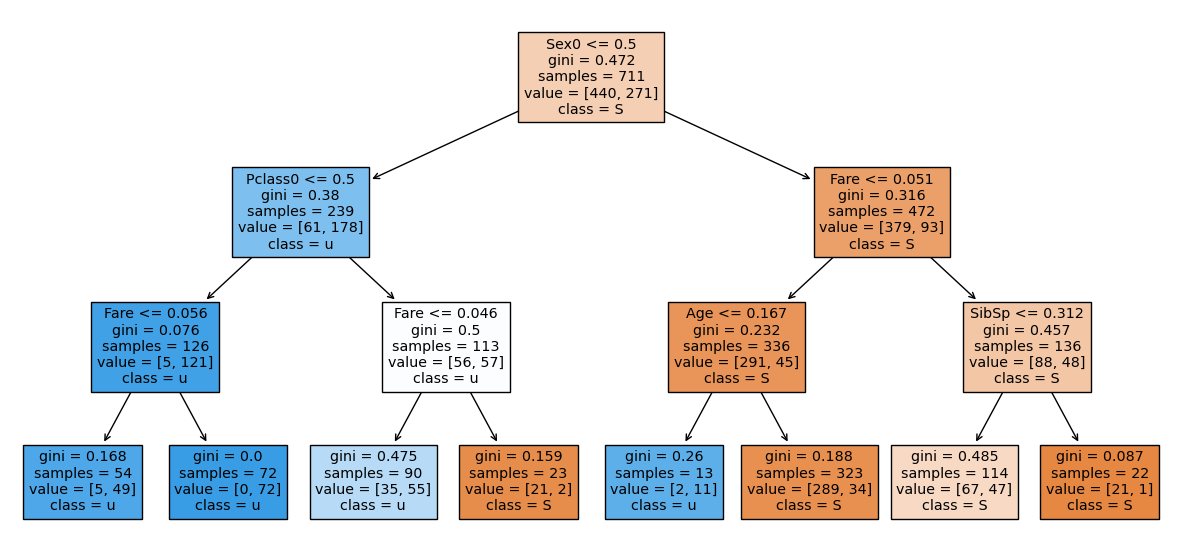

In [25]:
from sklearn.tree import plot_tree

# Визуализируем дерево глубиной 3
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model = model.fit(X_train, y_train)

fig = plt.figure(figsize=(15, 7))
_ = plot_tree(model,
              feature_names=X.columns,
              class_names=y.name,
              filled=True)

# Обучение полносвязной модели (глубокое обучение)

In [26]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [27]:
# Инициализируем архитектуру: 12 входных нейронов (по количеству признаков/фич), 2 скрытых слоя по 32 нейрона, 1 выходной нейрон
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1:])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компилируем модель:
# указываем оптимизатор (который помогает более эффективно корректировать веса)
# функцию потерь (чтобы модель по ней оптимизировалась)
# метрику (чтобы оценить качество работы модели)
model.compile(optimizer=Adam(learning_rate=0.001), loss='MAE', metrics='accuracy')
# Визуализируем архитектуру
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1505 (5.88 KB)
Trainable params: 1505 (5.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Обучаем модель
# epochs - количество итераций обучения (полных проходов по тренировочной выборке)
# batch_size - внутри эпохи набор данных бьется на партии (batch), необходимо указать количество данных, которые попадут в одну партию
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=250, batch_size=128)

Epoch 1/250
6/6 [==============================] - 2s 89ms/step - loss: 0.4635 - accuracy: 0.6231 - val_loss: 0.4514 - val_accuracy: 0.6180
Epoch 2/250
6/6 [==============================] - 0s 20ms/step - loss: 0.4468 - accuracy: 0.6371 - val_loss: 0.4350 - val_accuracy: 0.6685
Epoch 3/250
6/6 [==============================] - 0s 34ms/step - loss: 0.4302 - accuracy: 0.6582 - val_loss: 0.4179 - val_accuracy: 0.6798
Epoch 4/250
6/6 [==============================] - 0s 16ms/step - loss: 0.4131 - accuracy: 0.6624 - val_loss: 0.4005 - val_accuracy: 0.6798
Epoch 5/250
6/6 [==============================] - 0s 28ms/step - loss: 0.3965 - accuracy: 0.6624 - val_loss: 0.3835 - val_accuracy: 0.6798
Epoch 6/250
6/6 [==============================] - 0s 22ms/step - loss: 0.3800 - accuracy: 0.6653 - val_loss: 0.3677 - val_accuracy: 0.6854
Epoch 7/250
6/6 [==============================] - 0s 30ms/step - loss: 0.3651 - accuracy: 0.6723 - val_loss: 0.3527 - val_accuracy: 0.6966
Epoch 8/250
6/6 [===

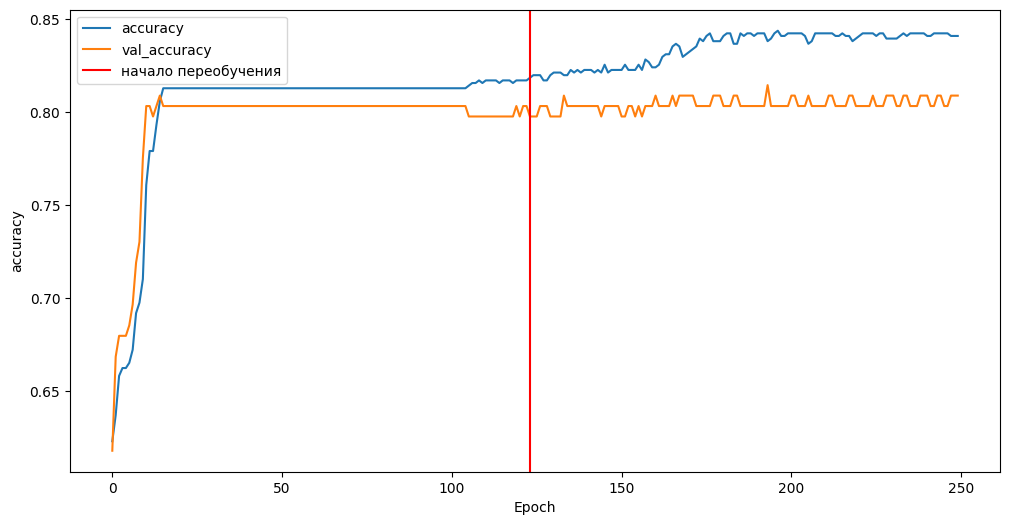

In [29]:
fig, axes = plt.subplots(figsize=(12, 6))
axes.plot(history.history['accuracy'], label='accuracy')
axes.plot(history.history['val_accuracy'], label='val_accuracy')
axes.axvline(x = 123, color = 'r', label = 'начало переобучения')
axes.set_xlabel('Epoch')
axes.set_ylabel('accuracy')
axes.legend()
plt.show()

In [30]:
print('Наилучшая достигнутая точность (accuracy):', max(history.history['val_accuracy']))

Наилучшая достигнутая точность (accuracy): 0.8146067261695862
